Fabian Brock

i6248959

# Data Analysis

# Clinic1: Exploratory Data Analysis

## DELIVERABLES (DEADLINE 17/February late night, wildcards possible)

Instructions for the deliverable: 

* Make sure that you include a proper amount/mix of comments, results and code.

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. Enjoy!

* Honor code applies to these tasks. Only individual work should be submitted.

* Data science is a collaborative activity. While you may talk with others about the clinic, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: None

### Learning goals

By completing and delivering the clinic tasks you will know how to :

* Load files and check their integrity
* Identifying the type of data collected, missing values, anomalies, etc.
* Wrangle data for analysis
* Parse columns in the dataframe to create new dataframe columns
* Use EDA to learn more about your data
* Create and interpret informative visualizations to explore the data set

## 0: Introduction to the Problem

We would like to help a business man in the city of Rome (let'"s call this guy Pim). Pim wants to introduce a scooter rental system for people to drive around the city. He got some data from a pilot that was conducted in the city and now he would like to know more about the users and be able to draw insights from this data.

In this clinic, you will perform tasks to clean, visualize, and explore the user data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

### 0.1 A note on the basic EDA workflow

Before we move to the actual clinic tasks, a reminder about the basic EDA workflow:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data'"s properties, and likely generates several questions for you to followup in subsequent analysis.

### 0.2 Grading

The clinic is broken down to several sub-questions so that they help you solve the tasks in an iterative way but also to facilitate grading. 

For responses that require numerical answers and some comment/discussion (free response), readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, you should abide to the basic principles as we have discussed in class. Note that for ALL plotting questions from here on out (also for other clinics), we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?


### Score breakdown per sub-question

Question | Points
--- | ---
Question 1a | 2
Question 1b | 1
Question 1c | 2
Question 1d | 4
Question 2a | 2
Question 2b | 2
Question 2c | 1
Question 2d | 1
Question 2e | 2
Question 2f | 2
Question 3a | 5
Question 3b | 3
Question 4  | 3
Question 5a | 2
Question 5b | 2
Question 6a | 1
Question 6b | 4
Question 6c | 3
Question 6d | 2
Question 7a | 4
Question 7b | 4
Total | 52

Your final score out of 52 will be scaled down to 1 and be your final grade for this clinic.

In [162]:
# First things first
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

# Default plot configurations
%matplotlib inline
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams["figure.dpi"] = 150
sns.set()

# :)
pd.options.mode.chained_assignment = None

from IPython.display import display, Latex, Markdown

### 0.3 Loading the data

The data we are exploring is collected at a period between 2011-2012 in Rome.

The variables in this data frame are defined as:

Variable       | Description
-------------- | ------------------------------------------------------------------
instant | record index
dteday | date
season | 1. spring <br> 2. summer <br> 3. fall <br> 4. winter
yr | year (0: 2011, 1:2012)
mnth | month ( 1 to 12)
hr | hour (0 to 23)
holiday | whether day is holiday or not
weekday | day of the week
workingday | if day is neither weekend nor holiday
weathersit | 1. clear or partly cloudy <br> 2. mist and clouds <br> 3. light snow or rain <br> 4. heavy rain or snow
temp | normalized temperature in Celsius (divided by 41)
atemp | normalized "feels-like" temperature in Celsius (divided by 50)
hum | normalized percent humidity (divided by 100)
windspeed| normalized wind speed (divided by 67)
casual | count of casual users
registered | count of registered users
cnt | count of total users including casual and registered  

The following code loads the data into a Pandas `DataFrame'".

In [163]:
# Run this cell to load the data.  No further action is needed
full = pd.read_csv("data/clientnumbers.txt")
full.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Below, we show the shape of the file. You should see that the size of the DataFrame matches the number of lines in the file, minus the header row.

In [164]:
full.shape

(17379, 17)

---
## 1: Data Preparation
A few of the variables that are numeric/integer actually encode categorical data. These include `holiday`, `weekday`, `workingday`, and `weathersit`. In the following problem, we will convert these four variables to strings specifying the categories. In particular, use 3-letter labels (`Sun`, `Mon`, `Tue`, `Wed`, `Thu`, `Fri`, and `Sat`) for `weekday`. You may simply use `yes`/`no` for `holiday` and `workingday`. 

In this exercise we will *mutate* the data frame, **overwriting the corresponding variables in the data frame.** However, our notebook will effectively document this in-place data transformation for future readers. Make sure to leave the underlying datafile `clientnumbers.txt` unmodified.

### Question 1
#### Question 1a (Decoding `weekday`, `workingday`, and `weathersit`)

Decode the `holiday`, `weekday`, `workingday`, and `weathersit` fields:

1. `holiday`: Convert to `yes` and `no`.  Hint: There are fewer holidays...
1. `weekday`: It turns out that Monday is the day with the most holidays.  Mutate the `'"weekday'` column to use the 3-letter label (`'Sun'`, `'Mon'`, `'Tue'`, `'Wed'`, `'Thu'`, `'Fri'`, and `'Sat'` ...) instead of its current numerical values. Assume `0` corresponds to `Sun`, `1` to `Mon` and so on.
1. `workingday`: Convert to `yes` and `no`.
1. `weathersit`: You should replace each value with one of `Clear`, `Mist`, `Light`, or `Heavy`.

**Note:** If you want to revert changes, run the cell that reloads the file.

**Hint:**  One approach is to use the [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method of the pandas DataFrame class. We haven't discussed how to do this so you'll need to look at the documentation. The most concise way is with the approach described in the documentation as "nested-dictonaries", though there are many possible solutions.

In [165]:
# make new df for the modifications
df = full.copy()

In [166]:
#your code for 1a goes here
# simply replacing the numerical values with strings
df.holiday.replace((0, 1), ("no", "yes"), inplace=True)

df.weekday.replace((0, 1, 2 , 3, 4, 5, 6), ("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"), inplace=True)

df.workingday.replace((0, 1), ("no", "yes"), inplace=True)

df.weathersit.replace((1, 2, 3, 4), ("Clear", "Mist", "Light", "Heavy"), inplace=True)

df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


#### Question 1b (Holidays)

How many entries in the data correspond to holidays?  Set the variable `num_holidays` to this value.

In [167]:
#Code for 1b goes here

# get the length of the df after filtering holiday rows
num_holidays = len(df[df.holiday == "yes"])
num_holidays

500

#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the daily number of registered and unregistered users.

Construct a data frame named `daily_counts` indexed by `dteday` with the following columns:
* `casual`: total number of casual users for each day
* `registered`: total number of registered users for each day
* `workingday`: whether that day is a working day or not (`yes` or `no`)

**Hint**: `groupby` and `agg`. For the `agg` method, please check the [documentation](https://pandas.pydata.org/docs/reference/groupby.html) for examples on applying different aggregations per column. If you use the capability to do different aggregations by column, you can do this task with a single call to `groupby` and `agg`. For the `workingday` column we can take any of the values since we are grouping by the day, thus the value will be the same within each group. Take a look at the `'"first'` or `'last'` aggregation functions.

In [168]:
###code for 1c goes here
daily_counts = df.groupby("dteday").agg({"casual": "sum", "registered": "sum", "workingday": "first"})
daily_counts


,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes
...,...,...,...
2012-12-27,247,1867,yes
2012-12-28,644,2451,yes
2012-12-29,159,1182,no


#### Question 1d (Identifying issues with the data)

Inspect the variables (based on the codebook) and identify potential issues with one (or more) of them. Think about missing values, mistakes, outliers, errors etc. Correct these and justify your answers accordingly.

No missing values

In [169]:
###code for 1d goes here
#check for nan/null/missing values
full.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [170]:
df.describe()

,instant,season,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.827148,189.452673
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.465780,181.392093
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,896.000000,977.000000


The weathersit column has 0s assumingly when the weather situation is unclear? It is not a big issue but should be disclosed above

---
## 2: Exploring the Distribution of Users

Let'"s begin by comparing the distribution of the daily counts of casual and registered users. The following questions require some heavy plotting. Below we are summarizing some functions (should be updated on the latest versions).

### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None)` | Creates a histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `sns.histplot(data, x, y, hue, kde)` | Creates a distribution plot; `data` is a DataFrame; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve |
|`sns.lineplot(data, x, y, hue)` | Creates a line plot |
|`sns.scatterplot(data, x, y, hue, size)` | Creates a scatter plot; `size` is a vector that contains the size of point for each subcategory based on `hue` |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |
|`sns.jointplot(x, y, data, kind)` | Creates a joint plot of 2 variables with KDE plot in the middle and a distribution plot for each variable on the sides; `kind` determines the visualization type for the distribution plot, can be `scatter`, `kde` or `hist` |

**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process.

### Question 2
#### Question 2a

Use the [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot) function to create a plot that overlays the distribution of the daily counts of bike users, using blue to represent `casual` riders, and green to represent `registered` riders. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

**Hint:** You will need to set the `stat` parameter appropriately to match the desired plot.

Include a legend, xlabel, ylabel, and title. Read the [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) if you'"re not sure how to add these. After creating the plot, look at it and make sure you understand what the plot is actually telling us, e.g on a given day, the most likely number of registered riders we expect is ~4000, but it could be anywhere from nearly 0 to 7000.

**Update 13/2: distplot is deprecated, work with displot or histplot instead**

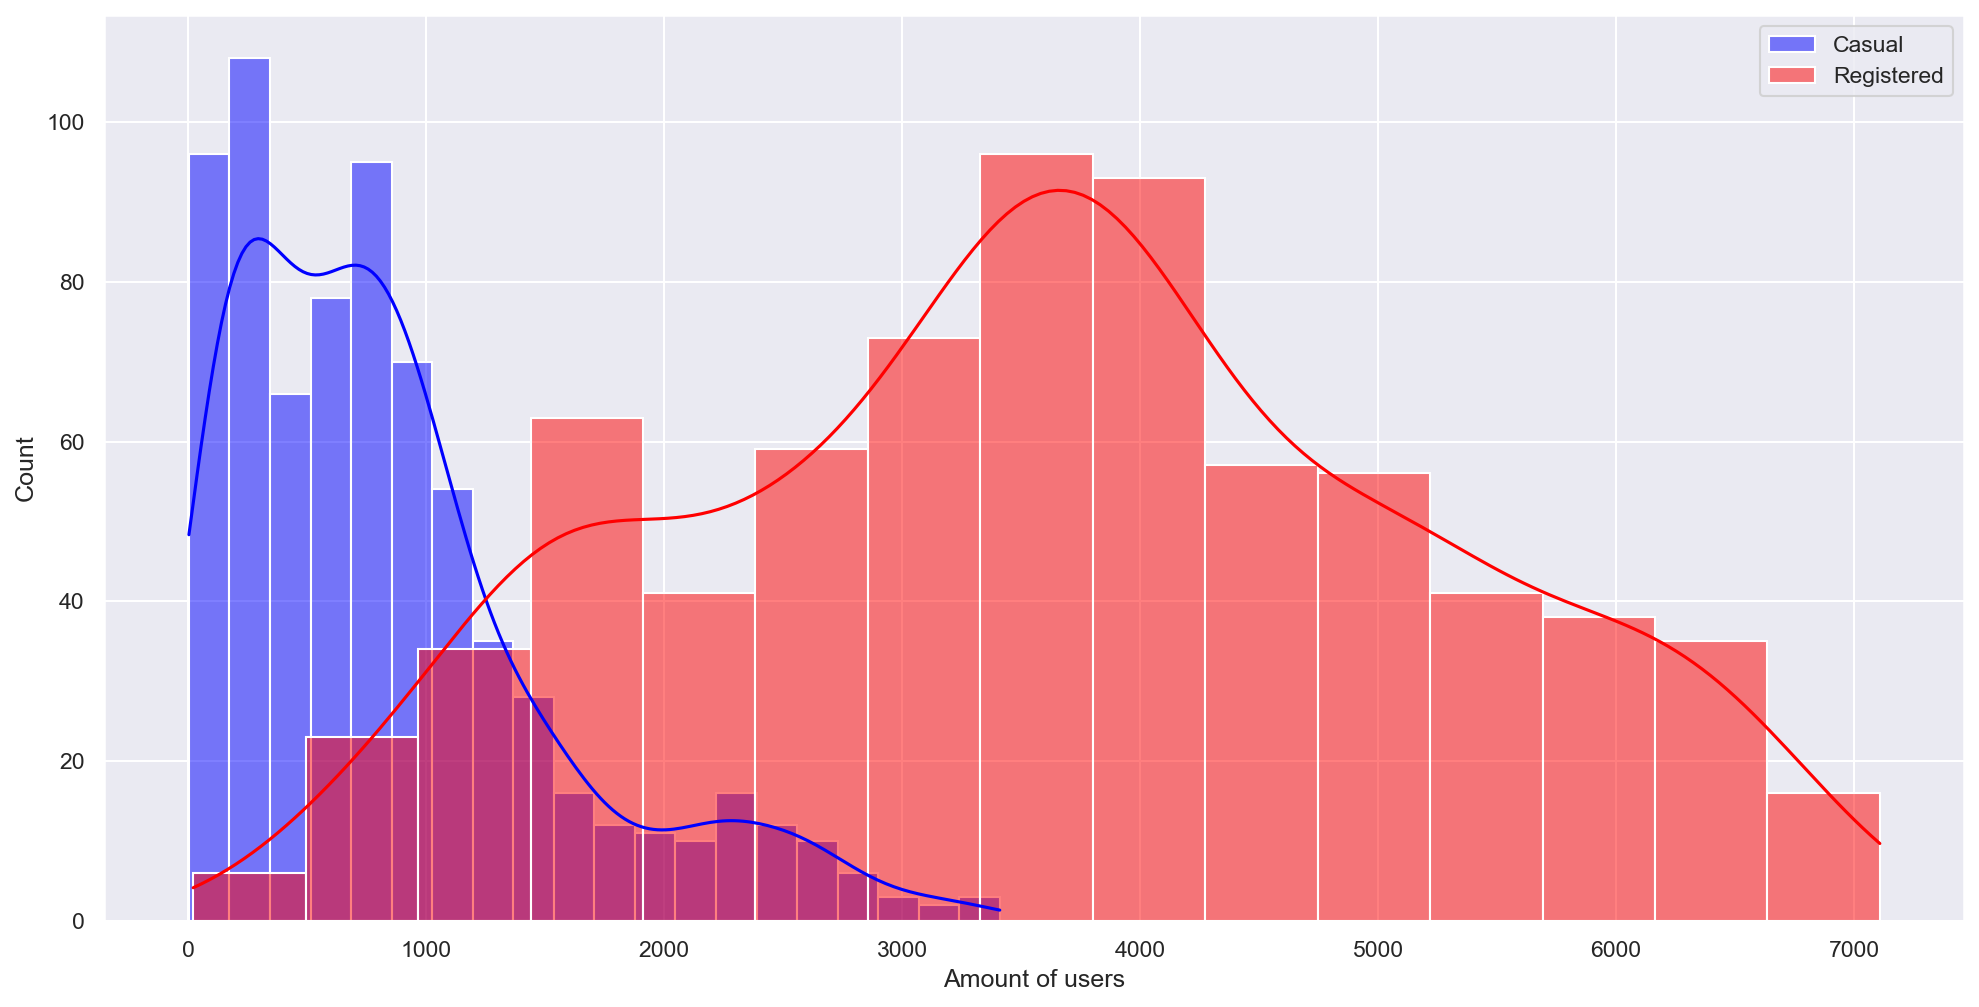

In [171]:
sns.histplot(data=daily_counts, x="casual", color="blue", label="Casual", kde=True)
sns.histplot(data=daily_counts, x="registered", color="red", label="Registered", kde=True)

plt.xlabel("Amount of users")
plt.legend()
plt.show()

### Question 2b

In the cell below, descibe the differences you notice between the density curves for casual and registered users.  Consider concepts such as modes, symmetry, skewness, tails, gaps and outliers.  Include a comment on the spread of the distributions. 

Registered users are distributed more normally, with a mean around 3500. The distribution is quite symmetrical, however with slight skew to the left as the count is higher at around 2000. A point of interest for registered users might lie around 2000, where there is a slight peak. There might also be some sort of outlier there.
The distribution for the casual users is far more skewed to the right. With its mode being closer to 500 whilst the mean lies slightly higher. Similarly to the registered users there might also be a point of interest at around 2000 where there is a slight peak.

### Question 2c

In addition to the type of user (casual vs. registered) and the overall count of each, what other kinds of demographic data would be useful (e.g. identity, neighborhood, monetary expenses, etc.)? 

It would be interesting to know if bikes are their main method of transportation i.e. if they have a car, public transport pass or something along those lines. Furthermore their neighborhood (especially regarding bike ways), and maybe their general wealth. Maybe some sort of fitness metric, like BMI (i know it is not good).

### Question 2d

What is an example of a privacy or consent issue that could occur when accessing the demographic data you brought up in the previous question?

<!--
BEGIN QUESTION
name: q2d
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

People might not want to publicize their economic status, their neighborhood or e.g. their weight (in regards to athleticism). In general this is more sensitive data than simply their status of casual or registered. Naturally it would also be rather difficult to access such data if it is not provided by the user.



### Question 2e

The density plots do not show us how the counts for registered and casual users vary together. Use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to make a scatter plot to investigate the relationship between casual and registered counts. This time, let'"s use the `full` DataFrame to plot hourly counts instead of daily counts.

The `lmplot` function will also try to draw a linear regression line. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small to help reduce overplotting. Also make sure to set `fit_reg=True` to generate the linear regression line. You can set the `height` parameter if you want to adjust the size of the `lmplot`. Make sure to include a title.

**Hints (updated):**
* Checkout this helpful [tutorial on `lmplot`](https://seaborn.pydata.org/tutorial/regression.html).

* You will need to set `x`, `y`, and `hue` and the `scatter_kws` in the `sns.lmplot` call.

* You will need to call [`plt.title`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html) to add a title for the graph.

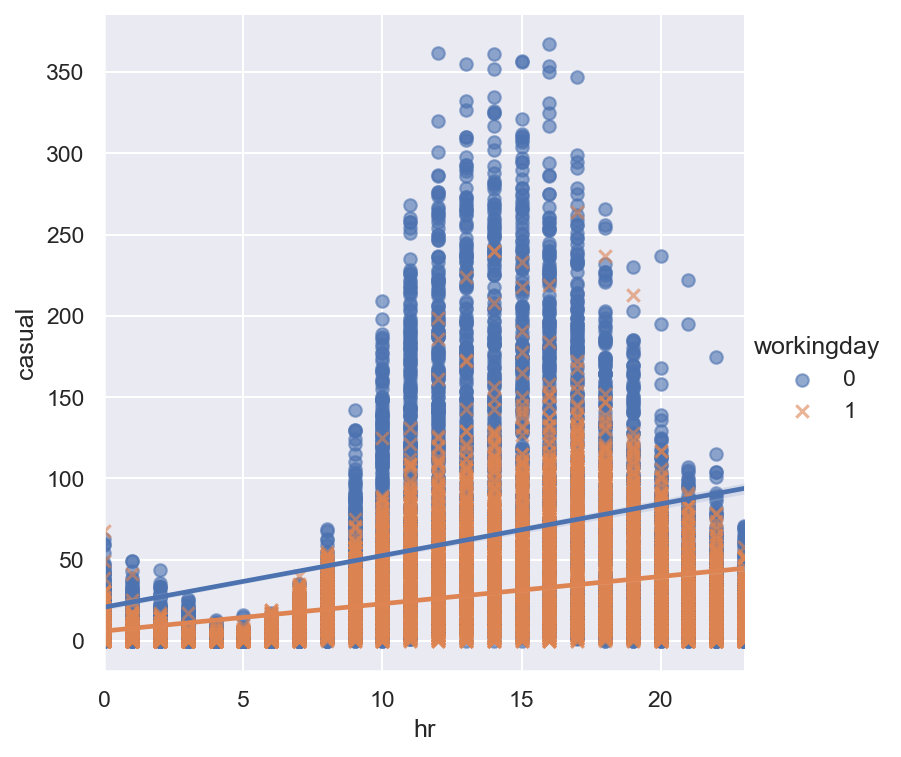

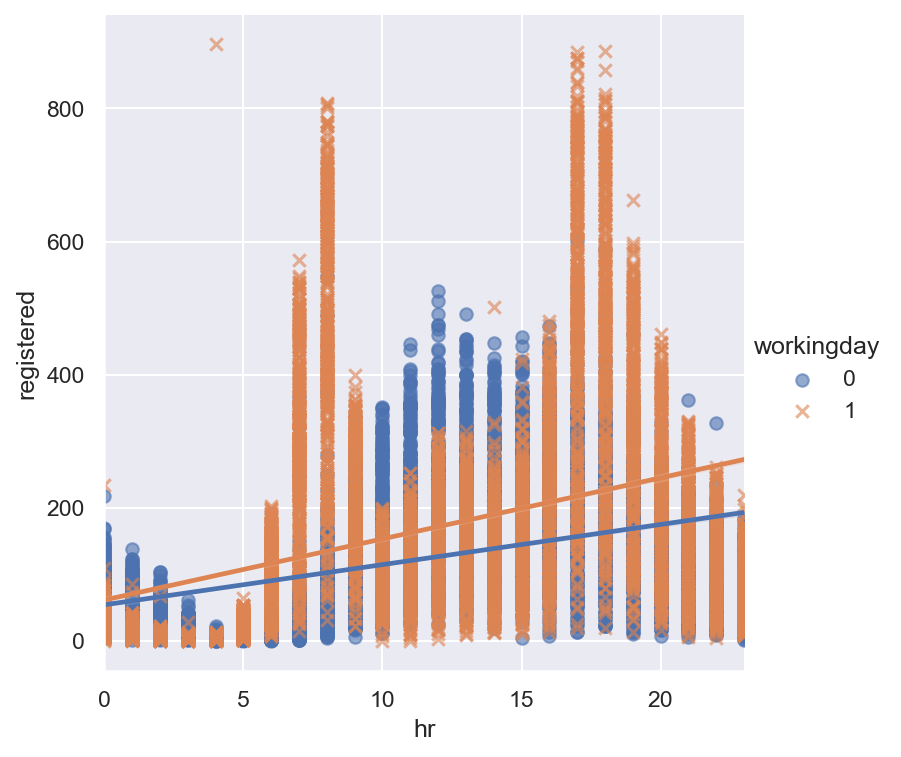

In [172]:
#code to 2e goes here
sns.lmplot(data=full ,x="hr", y="casual", hue="workingday",markers=["o","x"] ,fit_reg=True, scatter_kws={"alpha": 0.6})
sns.lmplot(data=full ,x="hr", y="registered", hue="workingday",markers=["o","x"] , fit_reg=True, scatter_kws={"alpha": 0.6});

# Depending on the setup, you might want to make the font size a bit bigger


### Question 2f

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered users and whether or not the day is a working day or not? What effect does [overplotting](https://www.displayr.com/what-is-overplotting/) have on your ability to describe this relationship?

Casual users prefer to use the bikes in the afternoon, presumably after work as leisure. Indicated by the higher usage on non-working days and the usage peaking around 15 o clock on working days. Registered users presumably use the bikes to get to and from work as indicated by the extremely high uses at around 9 and 5 with a dip in between. On non working days they also seem to use it, but more in the afternoon.

The way I plotted the data using low alpha values, it makes the data decently visible even in the extremely overlapping areas see registered graph at around 8 o clock. But of course it makes it more difficult to exactly see the amount of bikes used.

---
## 3: Visualization

### Question 3

#### Question 3a Bivariate Kernel Density Plot
 
To address overplotting, we will try visualizing the data with another technique, the bivariate kernel density estimate.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

You can think of this plot as an overhead countour or topographical map, where the "high" regions are those with more data points, and "low" regions are those with fewer data points.

A basic kde plot of all the data is quite easy to generate. However, this plot includes data from working and non-working days, which isn'"t what we want. Check the code below for how to generate a simple KDE plot. Adjust any variable names, if you have to.

In [173]:
daily_counts.head()

,casual,registered,workingday
dteday,,,
2011-01-01,331,654,no
2011-01-02,131,670,no
2011-01-03,120,1229,yes
2011-01-04,108,1454,yes
2011-01-05,82,1518,yes


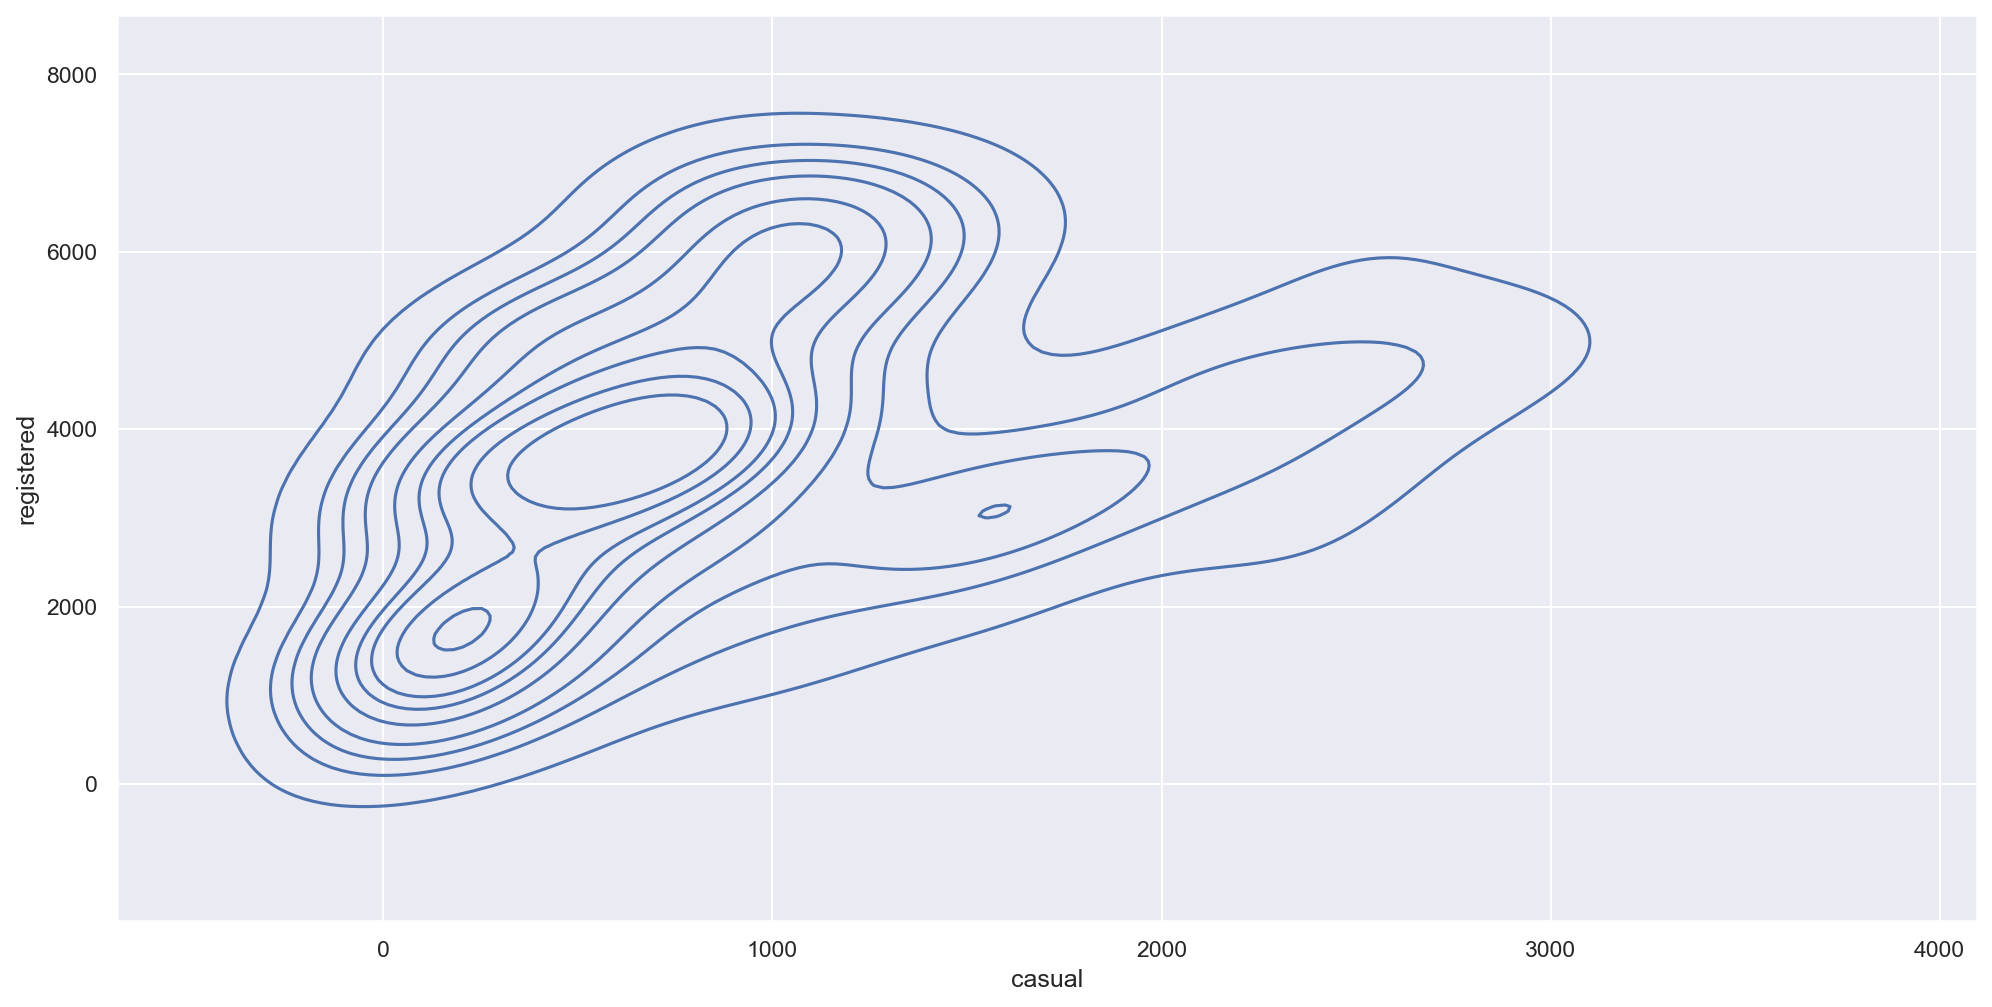

In [174]:
sns.kdeplot(data=daily_counts, x="casual", y="registered")
plt.show()

#deprecated (old) (update 13/2)
#sns.kdeplot(daily_counts["casual"], daily_counts["registered"])
#plt.title("KDE Plot Comparison of Registered vs Casual Users");

Generating the plot with working and non-working days separated can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

**Hints (updated):**
* You can use `loc` with a boolean array and column names at the same time
* You will need to call kdeplot twice, each time drawing different data from the `daily_counts` table.
* Check out this [guide](https://matplotlib.org/stable/tutorials/introductory/usage.html) to see an example of how to create a legend. In particular, look at how the example in the guide makes use of the `label` argument in the call to `plt.plot()` and what the `plt.legend()` call does. This is a good exercise to learn how to use examples to get the look you want.
* You will want to set the `cmap` parameter of `kdeplot` to `"Reds"` and `"Blues"` (or whatever two contrasting colors you'"d like), and also set the `label` parameter to address which type of day you want to plot. You are required for this question to use two sets of contrasting colors for your plots.

After you get your plot working, experiment by setting `shade=True` in `kdeplot` to see the difference between the shaded and unshaded version. Please submit your work with `shade=False`.

Im not sure I understand the expected plot correctly, but from what I understand the following is exactly what you want. cmap does not have to be set when using hues, and orange and blue is quite contrasting in my opinion

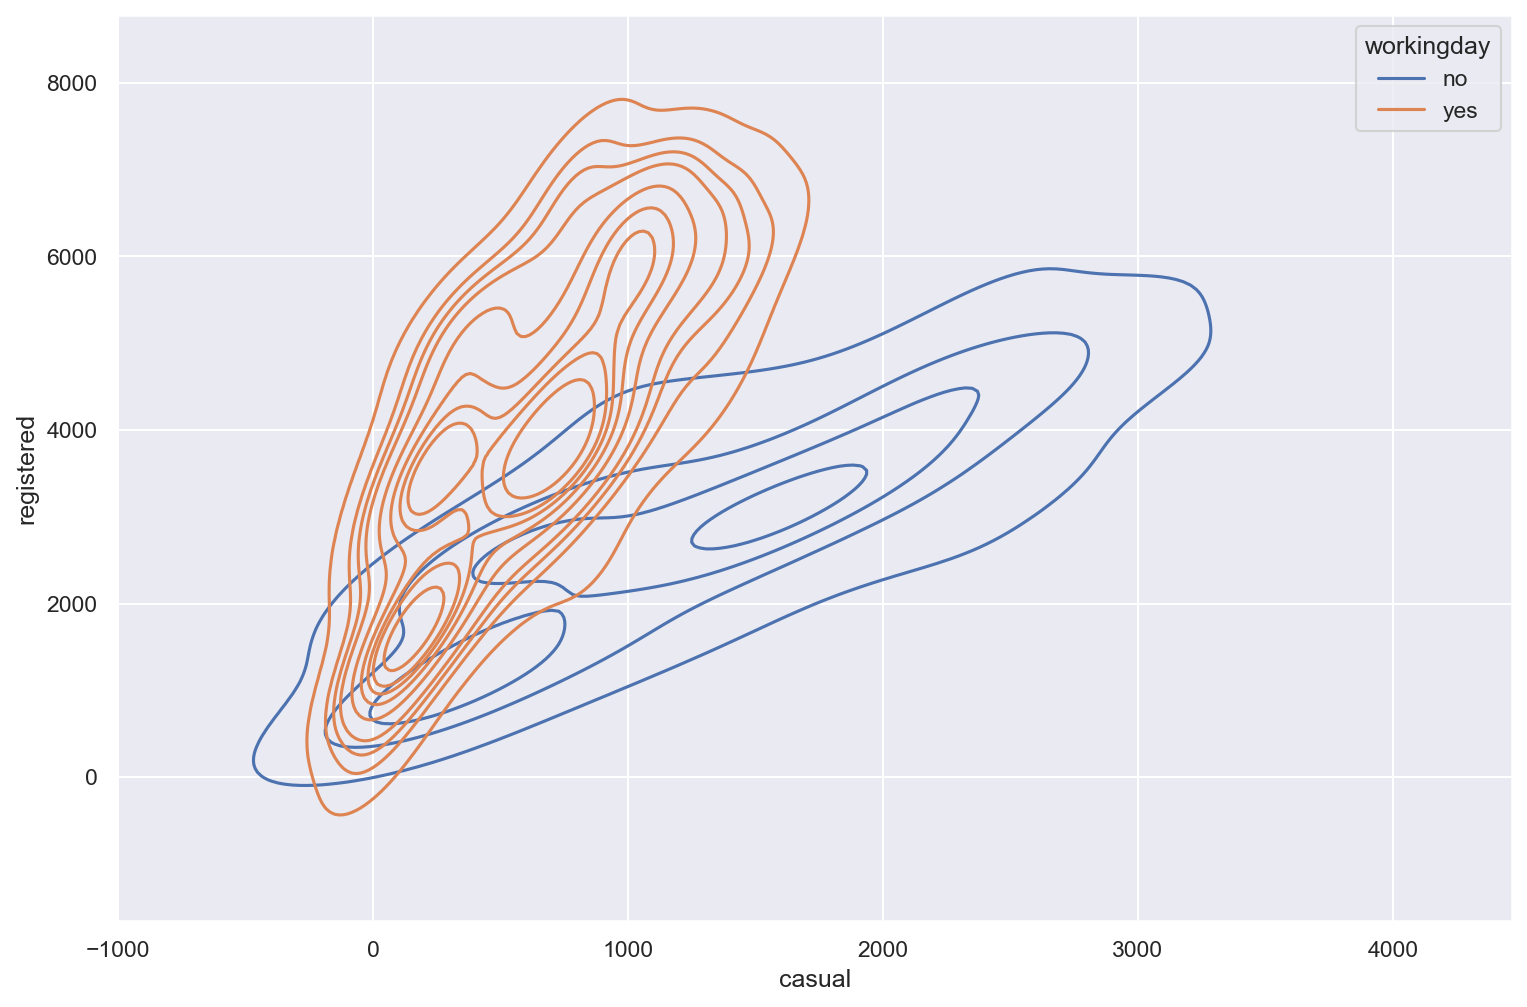

In [175]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=daily_counts, x="casual", y="registered", hue="workingday", shade=False)
plt.show()

#### Question 3b

What additional details can you identify from this contour plot that were difficult to determine from the scatter plot?

It is now more obvious than before that the registered users use the bikes more on working days as opposed to casual riders which prefer to use them on non working days.

## 4: Joint Plot

As an alternative approach to visualizing the data, construct the following set of three plots where the main plot shows the contours of the kernel density estimate of daily counts for registered and casual users plotted together, and the two "margin" plots (at the top and right of the figure) provide the univariate kernel density estimate of each of these variables. Note that this plot makes it harder see the linear relationships between casual and registered for the two different conditions (working day vs. non-working day).

**Hints (updated)**:
* The [seaborn plotting tutorial](https://seaborn.pydata.org/tutorial/distributions.html) has examples that may be helpful.
* Take a look at `sns.jointplot` and its `kind` parameter.
* `set_axis_labels` can be used to rename axes on the contour plot.

**Note**:
* At the end of the cell, we called `plt.suptitle` to set a custom location for the title.
* We also can call `plt.subplots_adjust(top=0.9)` in case your title overlaps with your plot.

Text(0.5, 0.99, 'Joint plot of casual and registered, regarding workingday')

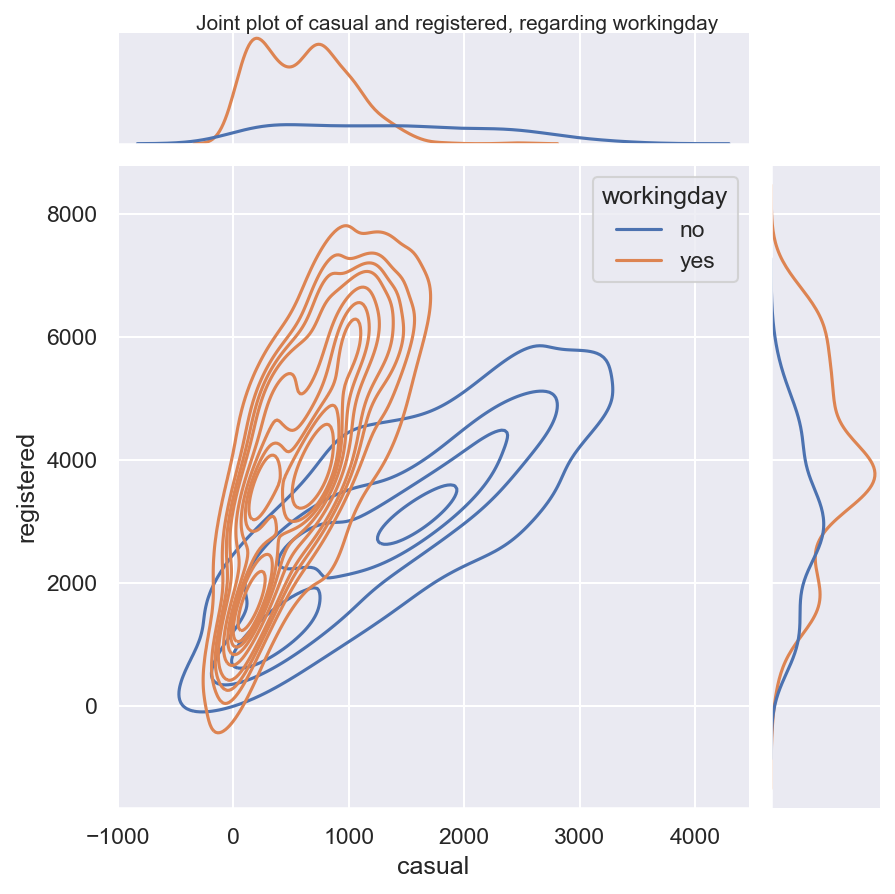

In [176]:
#code for 4 goes here
# Similarly to the previous task I used the hue to indicate whether it is a workingday or not. I reduced the title size and moved it up because it was overlapping
sns.jointplot(data=daily_counts, x="casual", y="registered", kind="kde", hue="workingday")
plt.suptitle(t="Joint plot of casual and registered, regarding workingday", fontsize="small", y=0.99)

---
## 5: Understanding Daily Patterns

### Question 5

#### Question 5a
Let'"s examine the behavior of users by plotting the average number of users for each hour of the day over the **entire dataset**, stratified by user type. Here, two line plots in the same figure should be okay (pay attention to proper labeling).


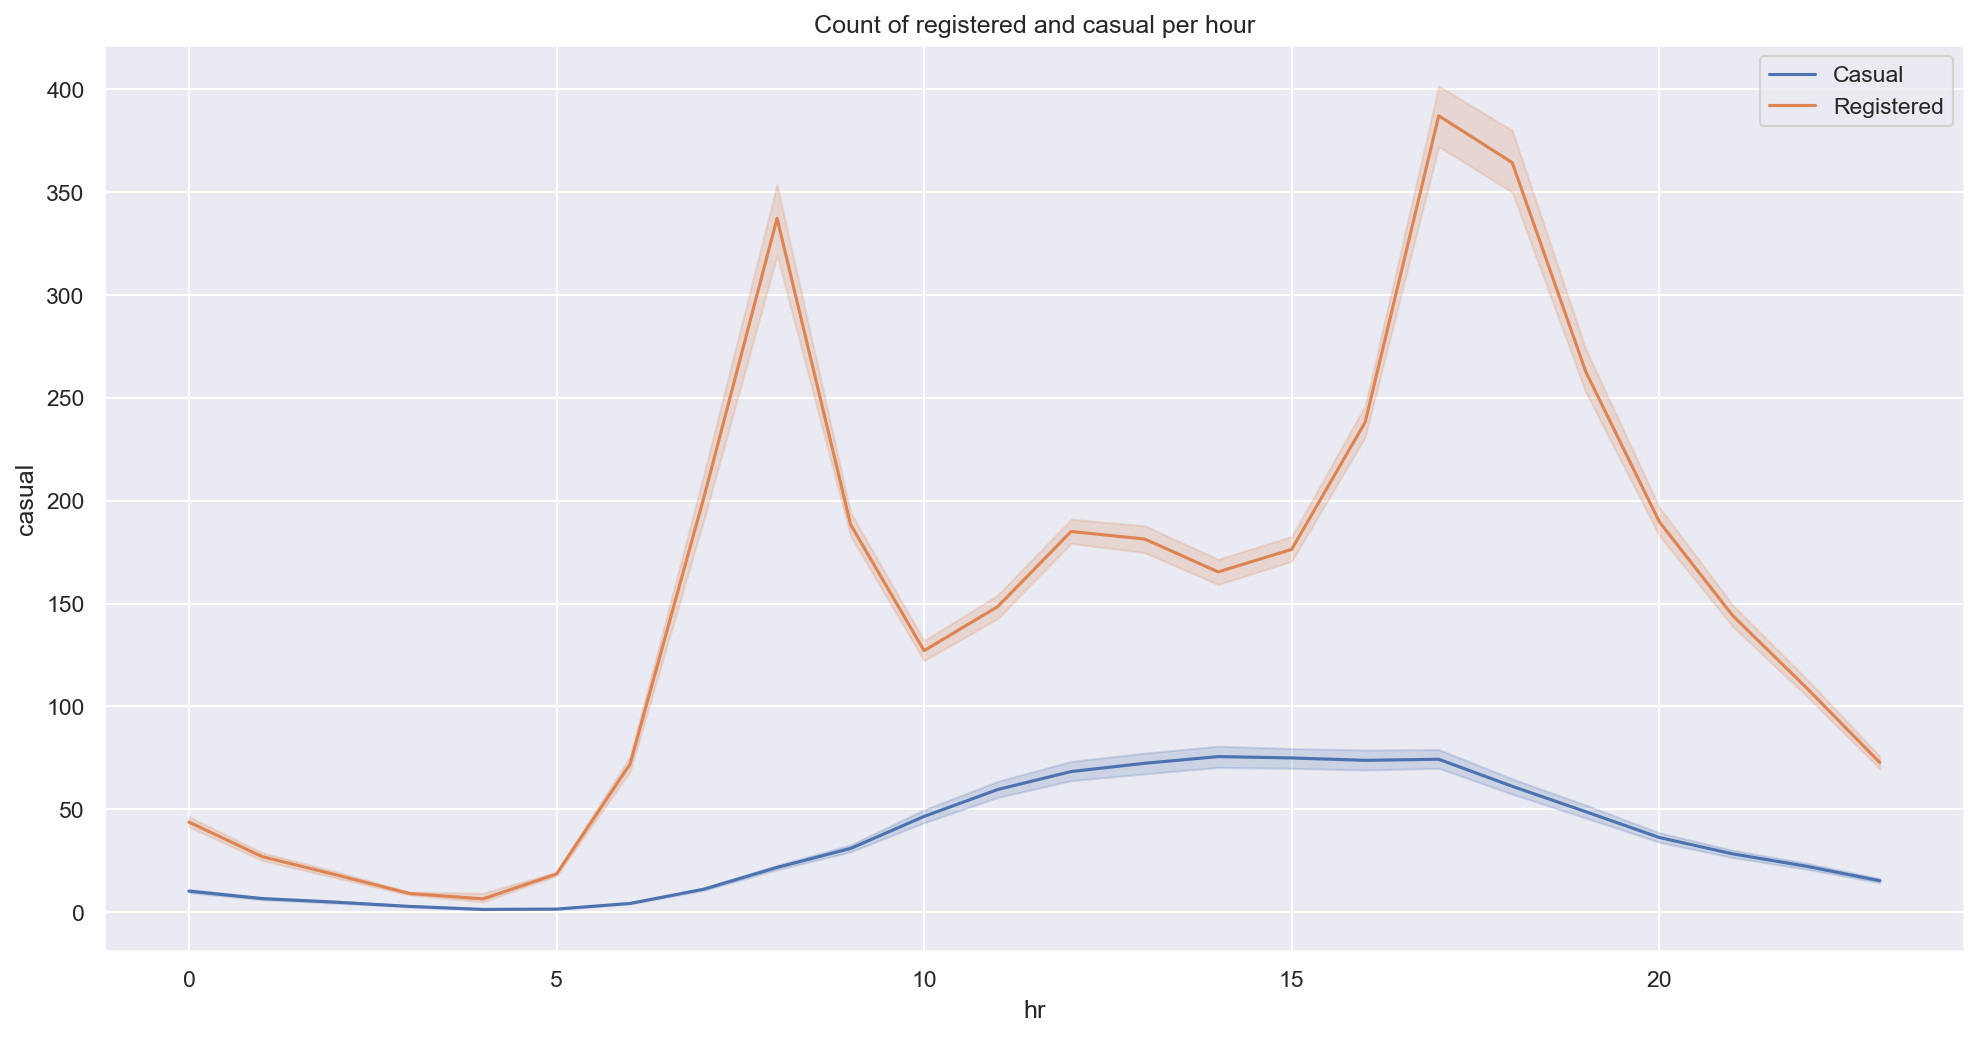

In [177]:
#answer to 5a goes here
fig, ax = plt.subplots()
sns.lineplot(data=full, x="hr", y="casual", label="Casual")
sns.lineplot(data=full, x="hr", y="registered", label="Registered")
ax.set(title="Count of registered and casual per hour")
plt.show()

#### Question 5b

What can you observe from the plot?  Hypothesize about the meaning of the peaks in the registered users'" distribution.

As mentioned before I hypothesize that the 2 peaks are registered users using bikes to get TO and FROM work via bike. Since most people work 9 - 5, the times line up, with the peaks being at around 9 and 5. People that only work part-time or go for lunch using the bike might be the third small peak in the middle.

---
## 6: Exploring Users and Weather

Now let'"s examine how the weather is affecting user' behavior. First let's look at how the proportion of casual user changes as weather changes.

### Question 6

#### Question 6a
Create a new column `prop_casual` in the `full` DataFrame representing the proportion of casual users out of all users.

In [178]:
#answer to 6a goes here
full["prop_casual"] = full["casual"] / full["cnt"]
full.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,prop_casual
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.000000


#### Question 6b
In order to examine the relationship between proportion of casual users and temperature, we can create a scatterplot using `sns.scatterplot`. We can even use color/hue to encode the information about day of week. Run the cell below (or adapt it if you have renamed any variables) and then comment on its explainability.

**Hint**: You will need to set the `data`, `x`, `y`, and `hue` in the `sns.scatterplot` call.

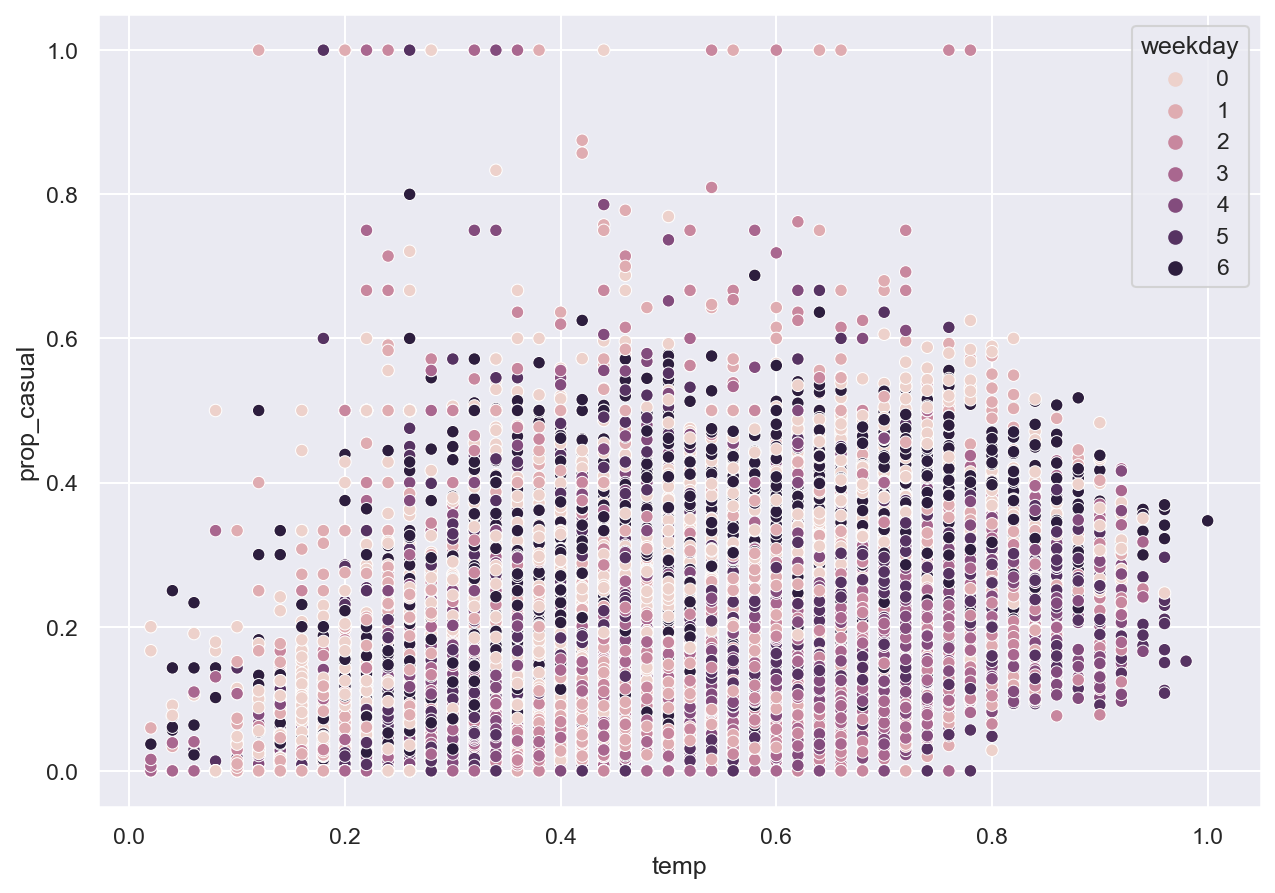

In [179]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=full, x="temp", y="prop_casual", hue="weekday");

How would you comment on this figure? Mention any problems you see. How would you think of approaching this problem?

The figure is not helpful, all the data is clumped together and the default hue is not very good at differentiating weekdays. No insights can be drawn from this figure.

A better approach is to use local smoothing. The basic idea is that for each x value, we compute some sort of representative y value that captures the data close to that x value. One technique for local smoothing is "Locally Weighted Scatterplot Smoothing" or LOWESS. An example is below. The green curve shown is a smoothed version of the scatterplot.

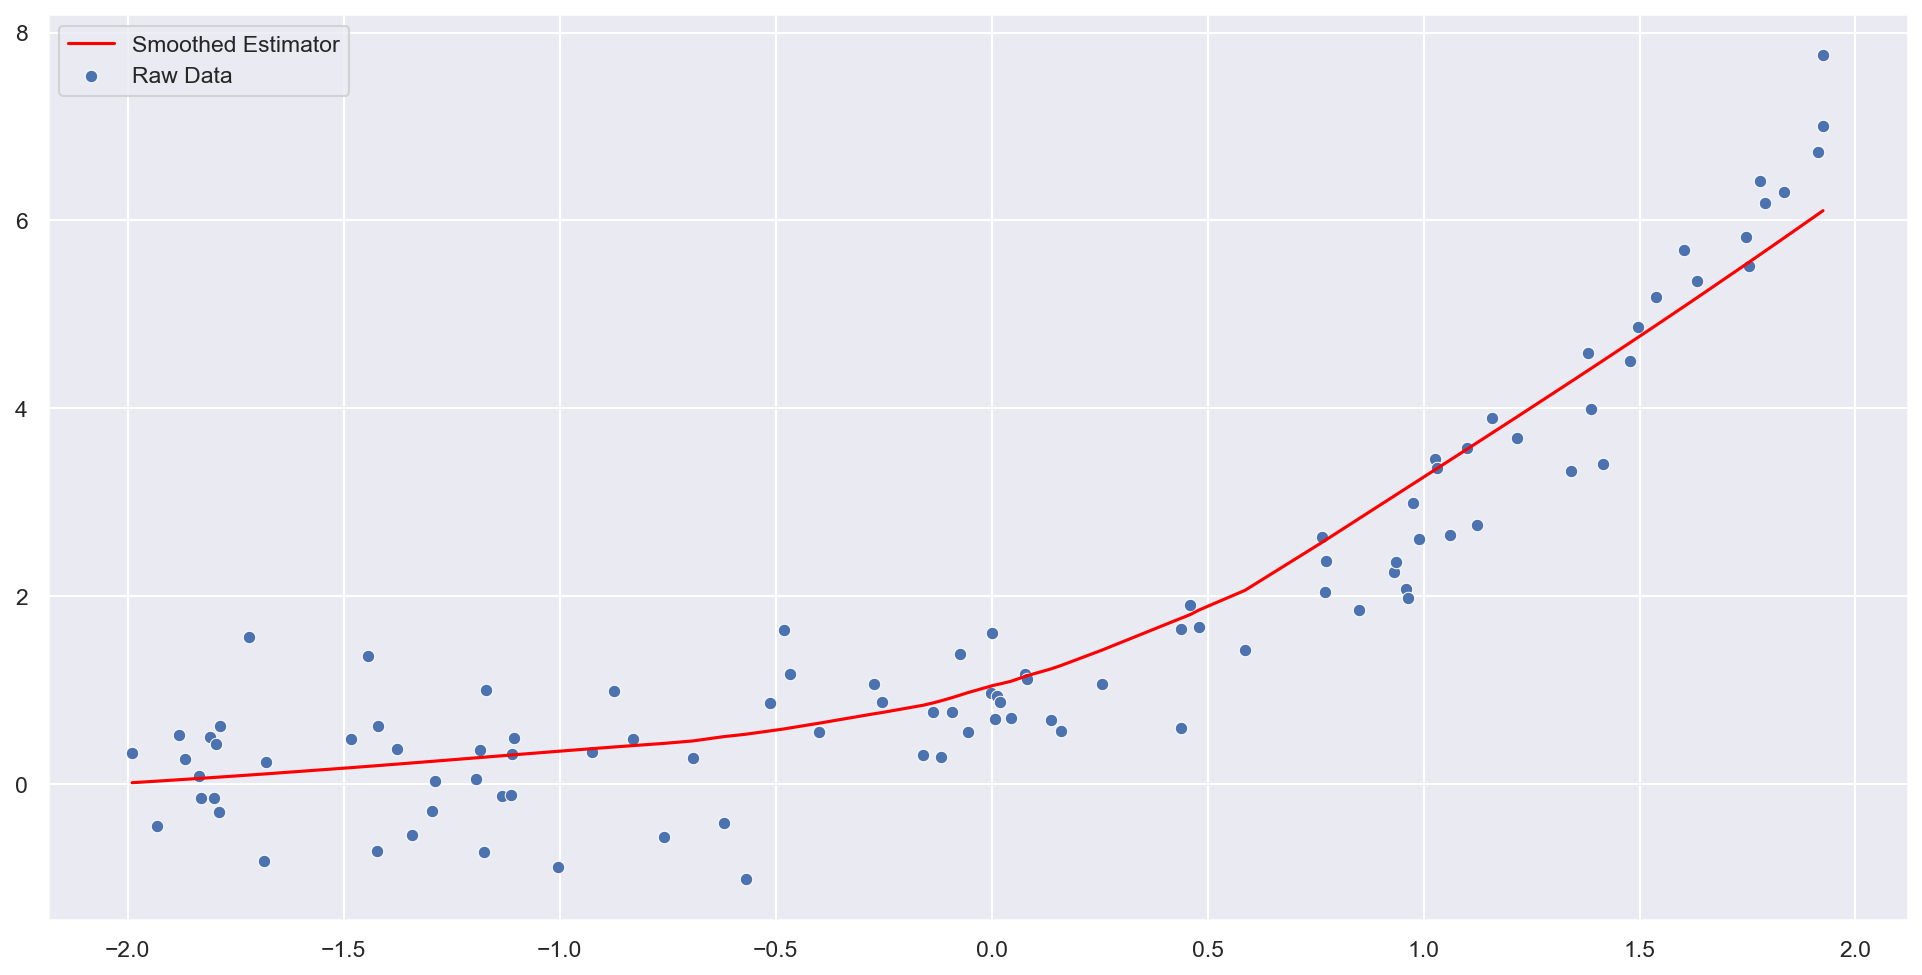

In [180]:
#updated 13/2
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 - 2)
yobs = np.exp(xobs) + np.random.randn(100) / 2.0
sns.scatterplot(x=xobs, y=yobs, label="Raw Data")

# Predict "smoothed" valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
sns.lineplot(x=xobs, y=ysmooth, label="Smoothed Estimator", color="red")
plt.legend();

In our case with the users'" data, we want 7 curves, one for each day of the week. The x-axis will be the temperature and the y-axis will be a smoothed version of the proportion of casual users.

You should use [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) just like the example above. Unlike the example above, plot ONLY the lowess curve. Do not plot the actual data, which would result in overplotting. For this problem, the simplest way is to use a loop.

**Hints:**
* Start by just plotting only one day of the week to make sure you can do that first.

* The `lowess` function expects y coordinate first, then x coordinate. You should also set the `return_sorted` field to `False`.

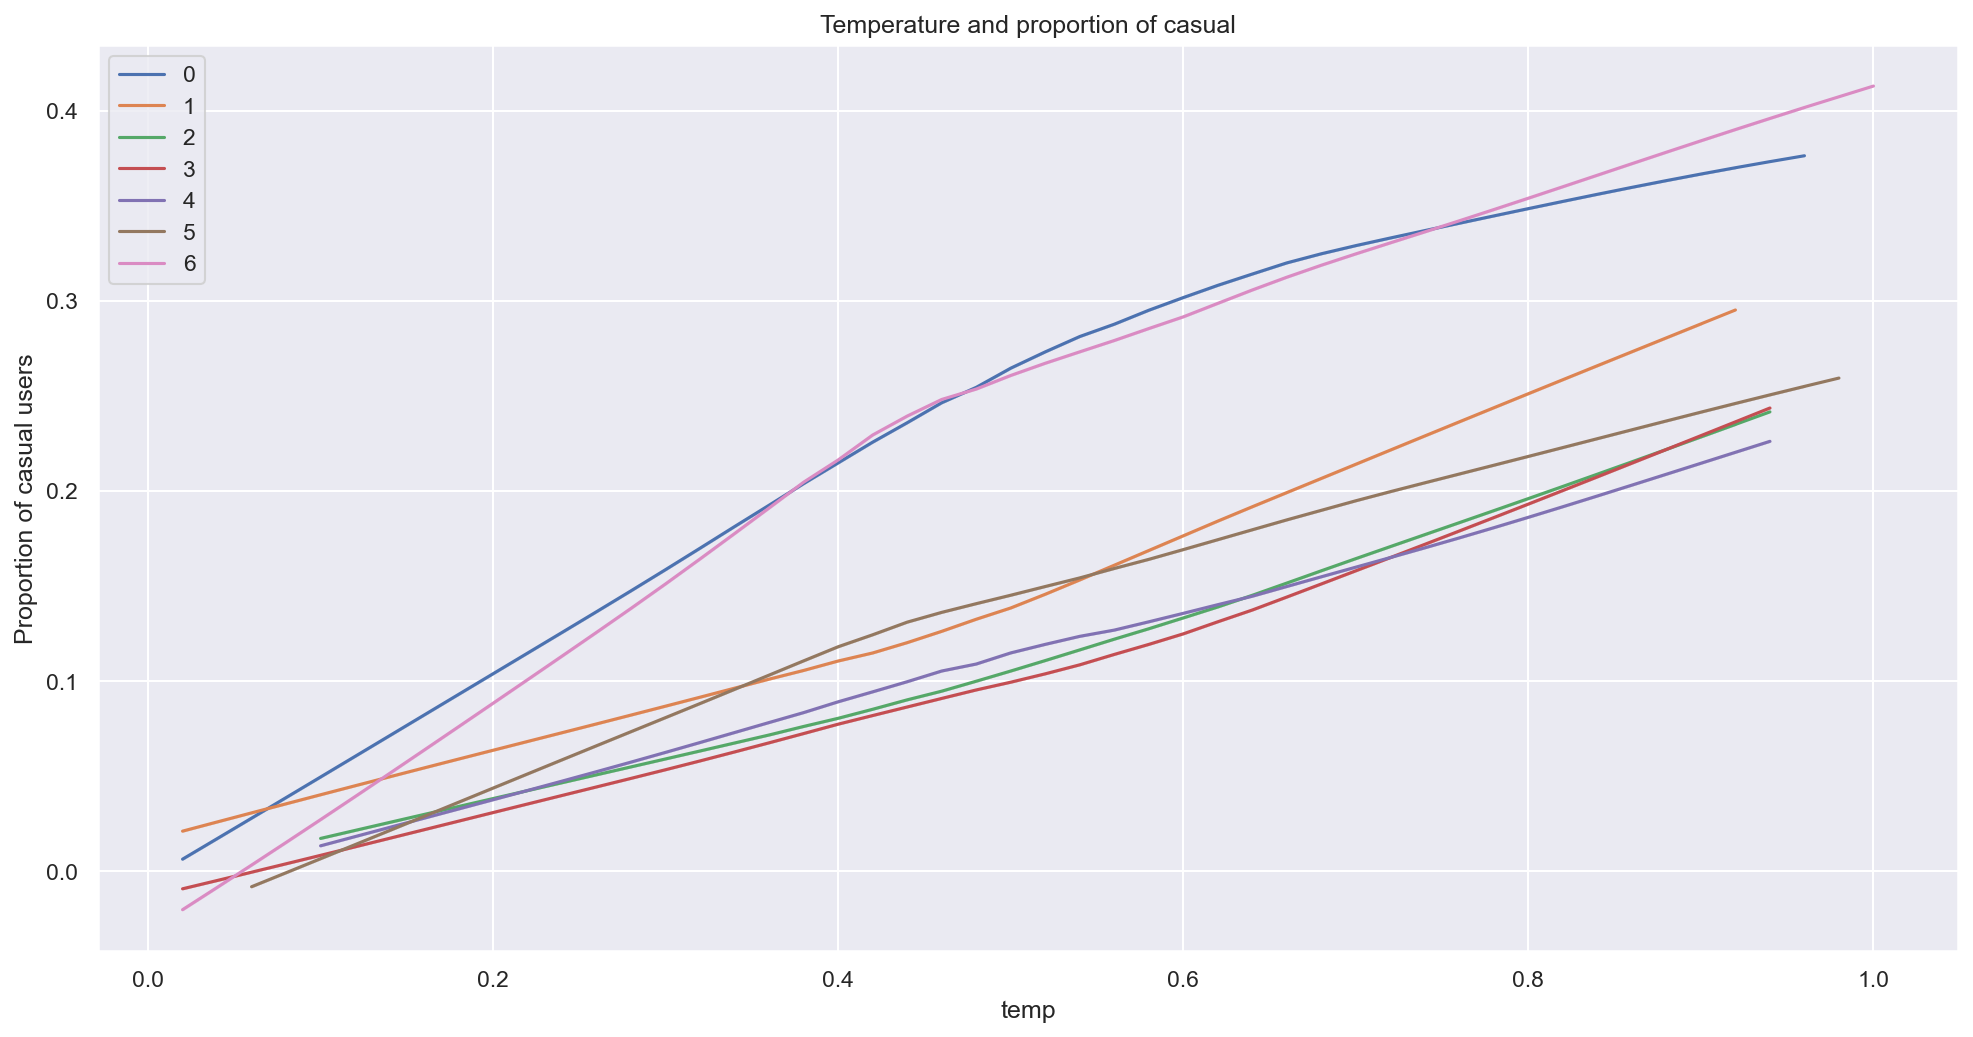

In [181]:
from statsmodels.nonparametric.smoothers_lowess import lowess

#your code for 6b
for wd in range(0,7):
    subset = full[full.weekday == wd]
    subset.sort_values(by="temp", inplace=True, ascending=True)

    yobs = subset["prop_casual"]
    xobs = subset["temp"]

    ysmooth = lowess(yobs, xobs, return_sorted=False)
    sns.lineplot(x=xobs, y=ysmooth, label=wd, color=sns.color_palette()[wd])
    plt.legend()

plt.title("Temperature and proportion of casual")
plt.ylabel("Proportion of casual users")
plt.show()

### Question 6c

What do you see from the curve plot? How is `prop_casual` changing as a function of temperature? Do you notice anything else interesting?

The higher the temperature is the more casual users there are. Additionally on saturday and sunday the proportion of casual users is also higher than on other days (as shown by the blue and purple line)

### Question 6d

Based on the data you have explored (distribution of users, daily patterns, weather, additional data/information you have seen), do you think this scooter user info should be realistically scaled across other cities in Italy. Why or why not? Justify your answer as a data scientist.

I do not see any big issues with this user info being scaled across italy. The only issue I see is that most there are of course many different cities and regions with different bike infrastructures. Eventhough I heard that italy is quite bike friendly, having a metric to track location would certainly be helpful. It is probably more likely that a user is registered in rome to get to work, whilst if he lives far from his work it is more unlikely. Additionally just to save some space complexity I do not think that windspeed or humidity is really important. Since italy is surrounded by ocean it is quite unlikely to have extreme humidities that would limit casual users, additionally humidity is already encapsulated in the atemp column. Windspeed is also not really a deciding factor (unless there is a hurricane which italy is not known for).

### Question 7a. Compute Something Interesting

Play with the data and try to compute something interesting about the data. Please try to use at least one of groupby, pivot, or merge (or all of the above).  

Please show your work in the cell below and describe in words what you found in the same cell. This question will be graded leniently but good solutions may be used to create future clinics.

#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): Uses a combination of pandas operations (such as groupby, pivot, merge) to answer a relevant question about the data. The text description provides a reasonable interpretation of the result.
- **Passing** (1-3 points): Computation is flawed or very simple. The text description is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No computation is performed, or a computation with completely wrong results.


***Put your code in one cell below and your explanation in a markdown cell below***

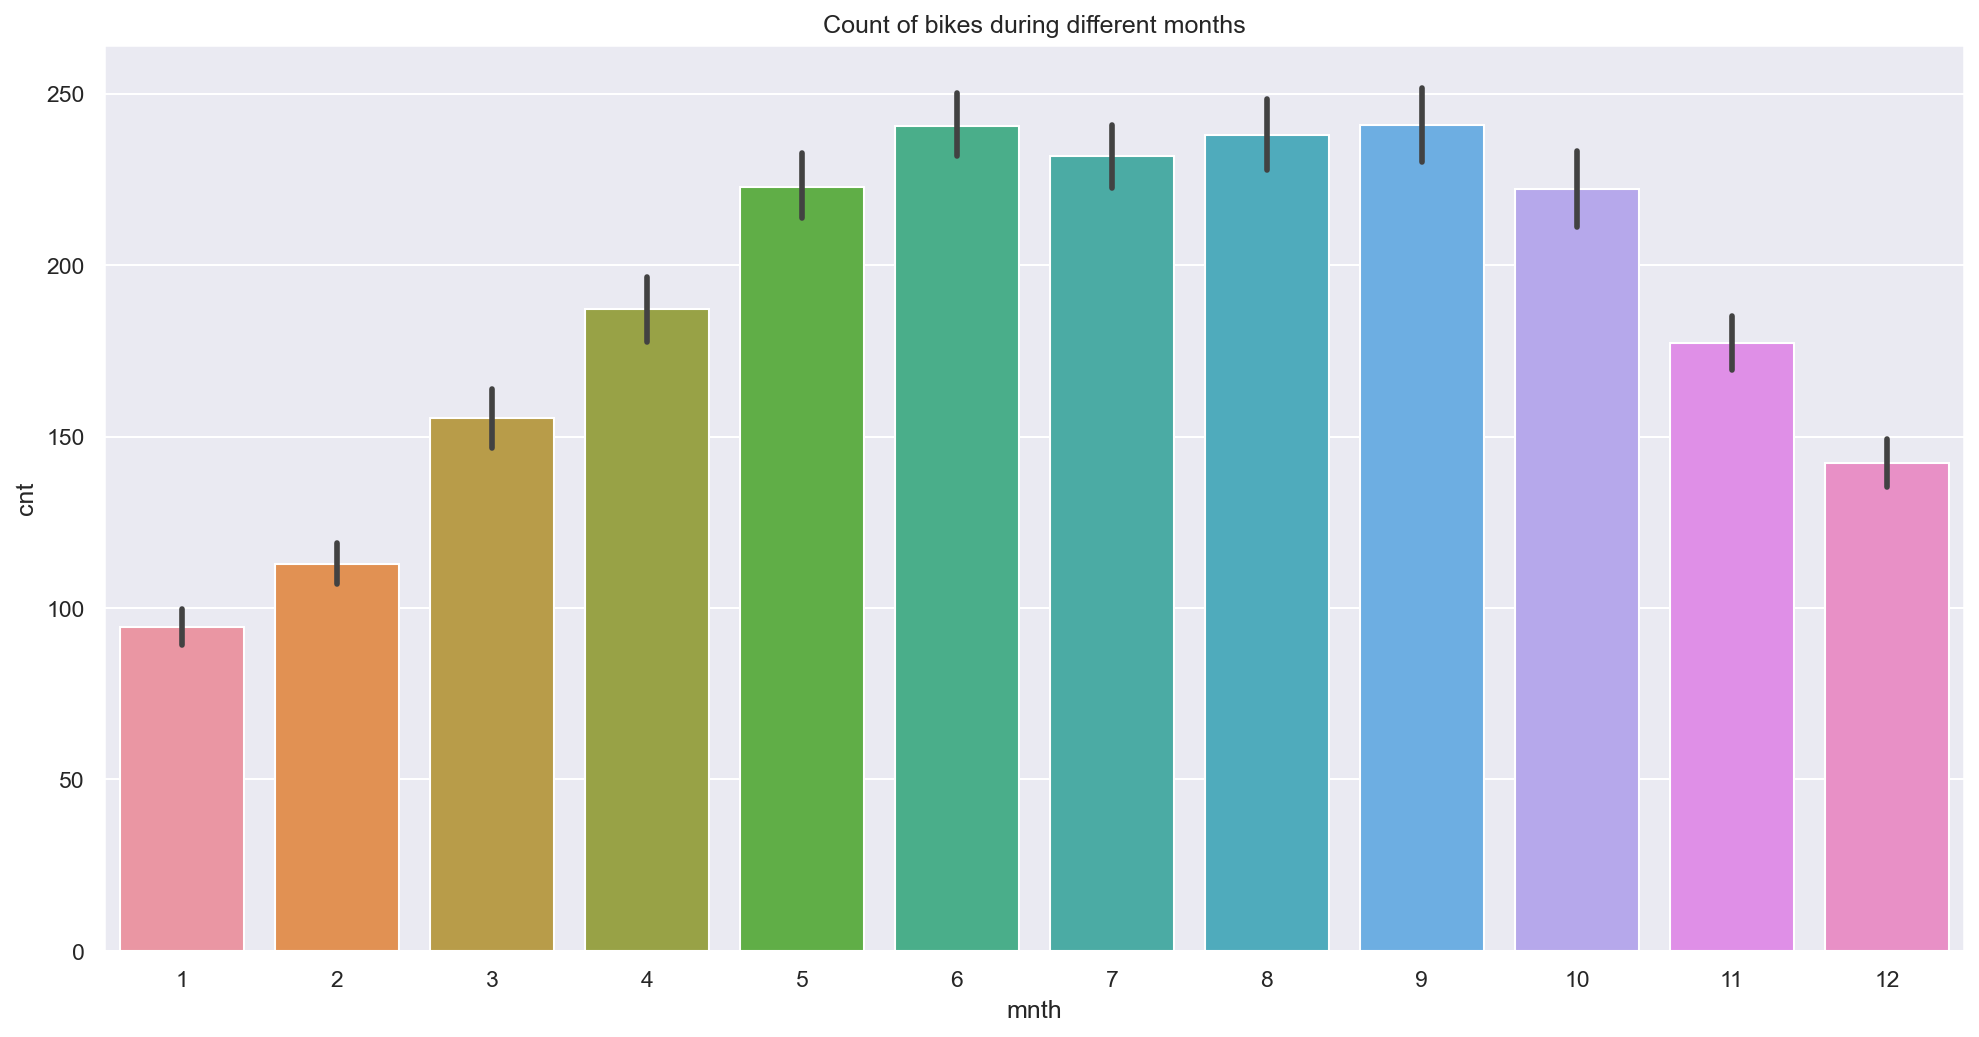

In [182]:
#your code for 7a
# something that was not done above was a monthly overview so I was interested in that

fig, ax = plt.subplots()
sns.barplot(data=full, x="mnth", y="cnt")
ax.set(title="Count of bikes during different months")
plt.show()

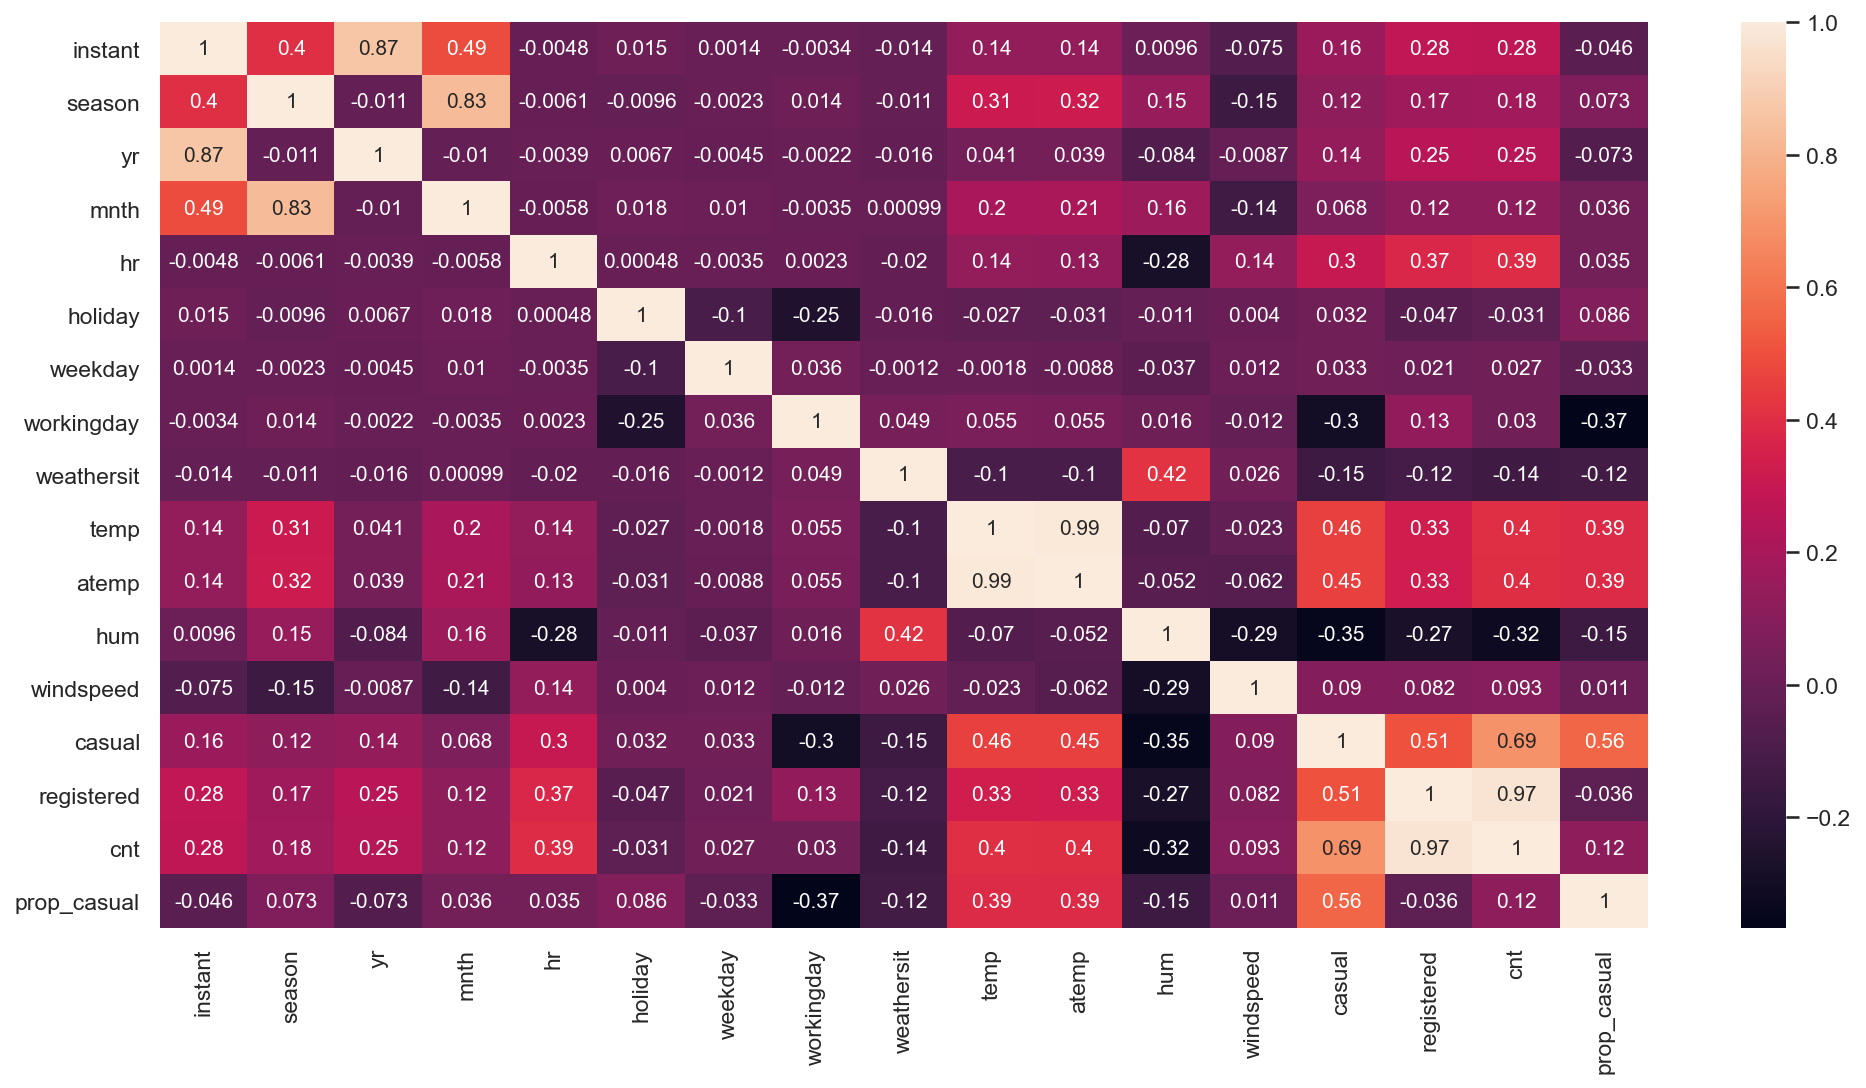

In [183]:
# Since I also theorized that temp, humidity and atemp might be correlated I will look at a correlation heatmap

mat = full.corr()
sns.heatmap(mat, annot=True, annot_kws={"size":10})
plt.show()

As expected, usage is highest in the warmer months (probably due to casual users). However a baseline is kept even in winter.

Again as expected temp and atemp are correlated very strongly, so dropping one of the 2 columns for performance reasons might be worthwhile if this system is scaled up.

### Question 7b. Create some more cool visualizations!

Play with the data, and try to produce some visualizations to answer one question that you find interesting regarding the data. You might want to use `merge`/`groupby`/`pivot` to process the data before creating visualizations.

Please show your work in the cells below (feel free to use extra cells if you want), and describe in words what you found. This question will be graded leniently, but good solutions may be used to create future clinic problems. 


#### Grading ####

Since the question is more open ended, we will have a more relaxed rubric, classifying your answers into the following three categories:

- **Great** (4 points): The chart is well designed, and the data computation is correct. The text written articulates a reasonable metric and correctly describes the relevant insight and answer to the question you are interested in.
- **Passing** (1-3 points): A chart is produced but with some flaws such as bad encoding. The text written is incomplete but makes some sense.
- **Unsatisfactory** (0 points): No chart is created, or a chart with completely wrong results.

You should have the following in your answers:
* a few visualizations; Please limit your visualizations to 5 plots.
* a few sentences (not too long please!)

***Put your code in one cell below and your explanation in a markdown cell below***

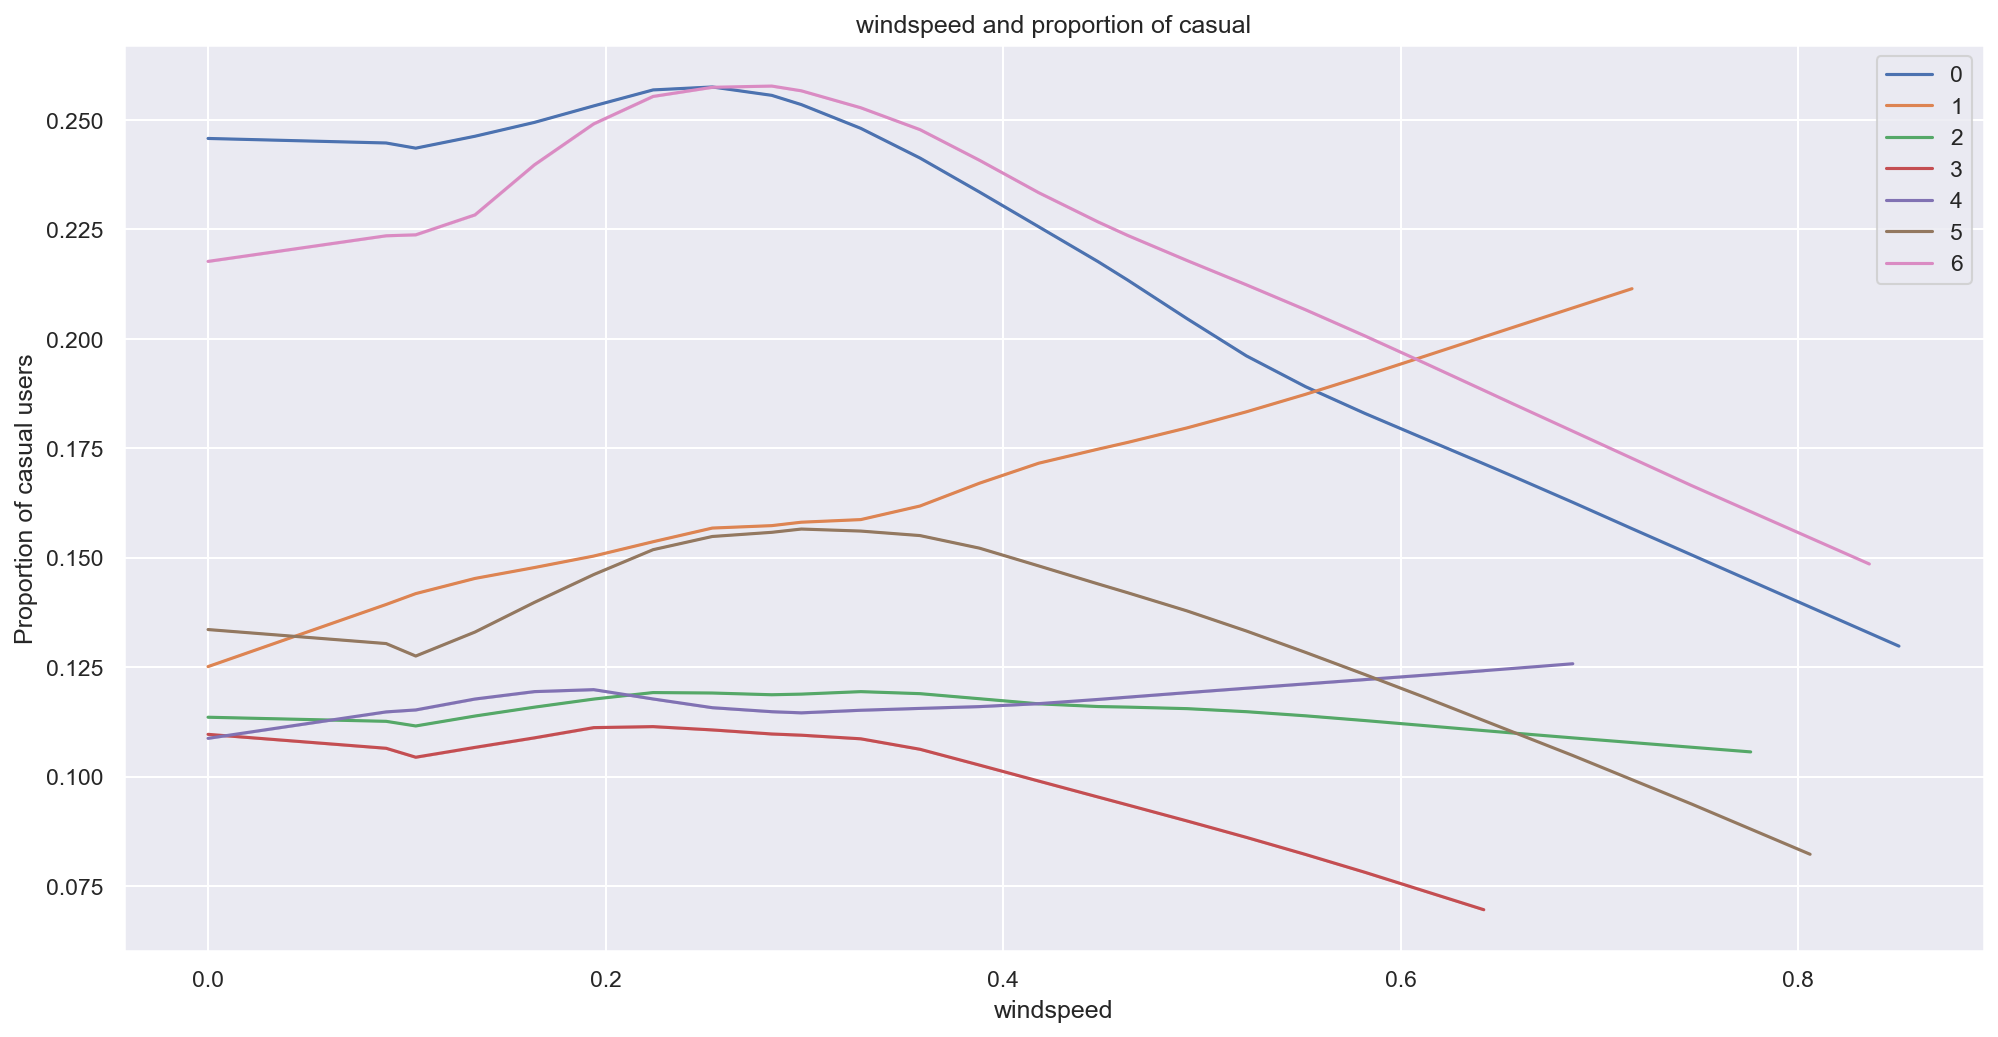

In [184]:
#your code for 7b
for wd in range(0,7):
    subset = full[full.weekday == wd]
    subset.sort_values(by="windspeed", inplace=True, ascending=True)

    yobs = subset["prop_casual"]
    xobs = subset["windspeed"]

    ysmooth = lowess(yobs, xobs, return_sorted=False)
    sns.lineplot(x=xobs, y=ysmooth, label=wd, color=sns.color_palette()[wd])
    plt.legend()

plt.title("windspeed and proportion of casual")
plt.ylabel("Proportion of casual users")
plt.show()

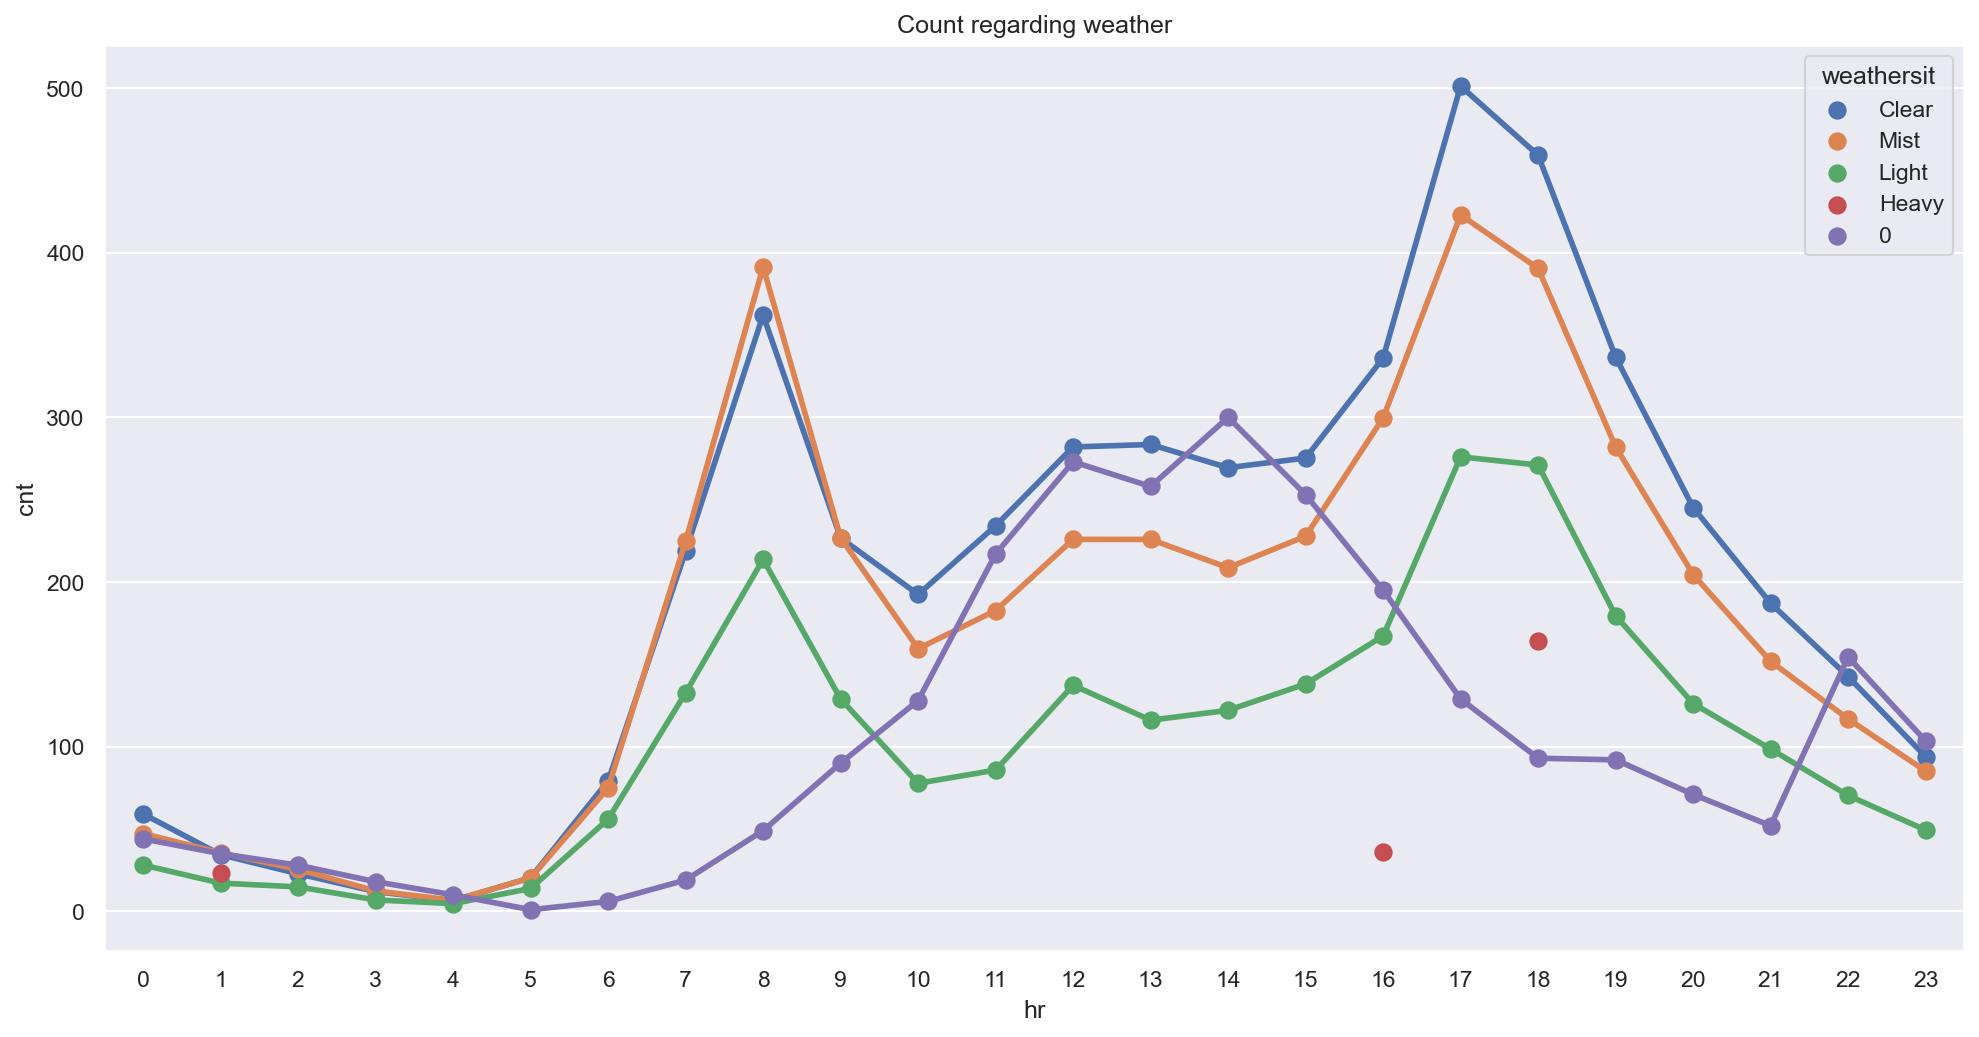

In [185]:
fig, ax = plt.subplots()
sns.pointplot(data=df, x="hr", y="cnt", hue="weathersit", ci=False)
ax.set(title="Count regarding weather")
plt.show()

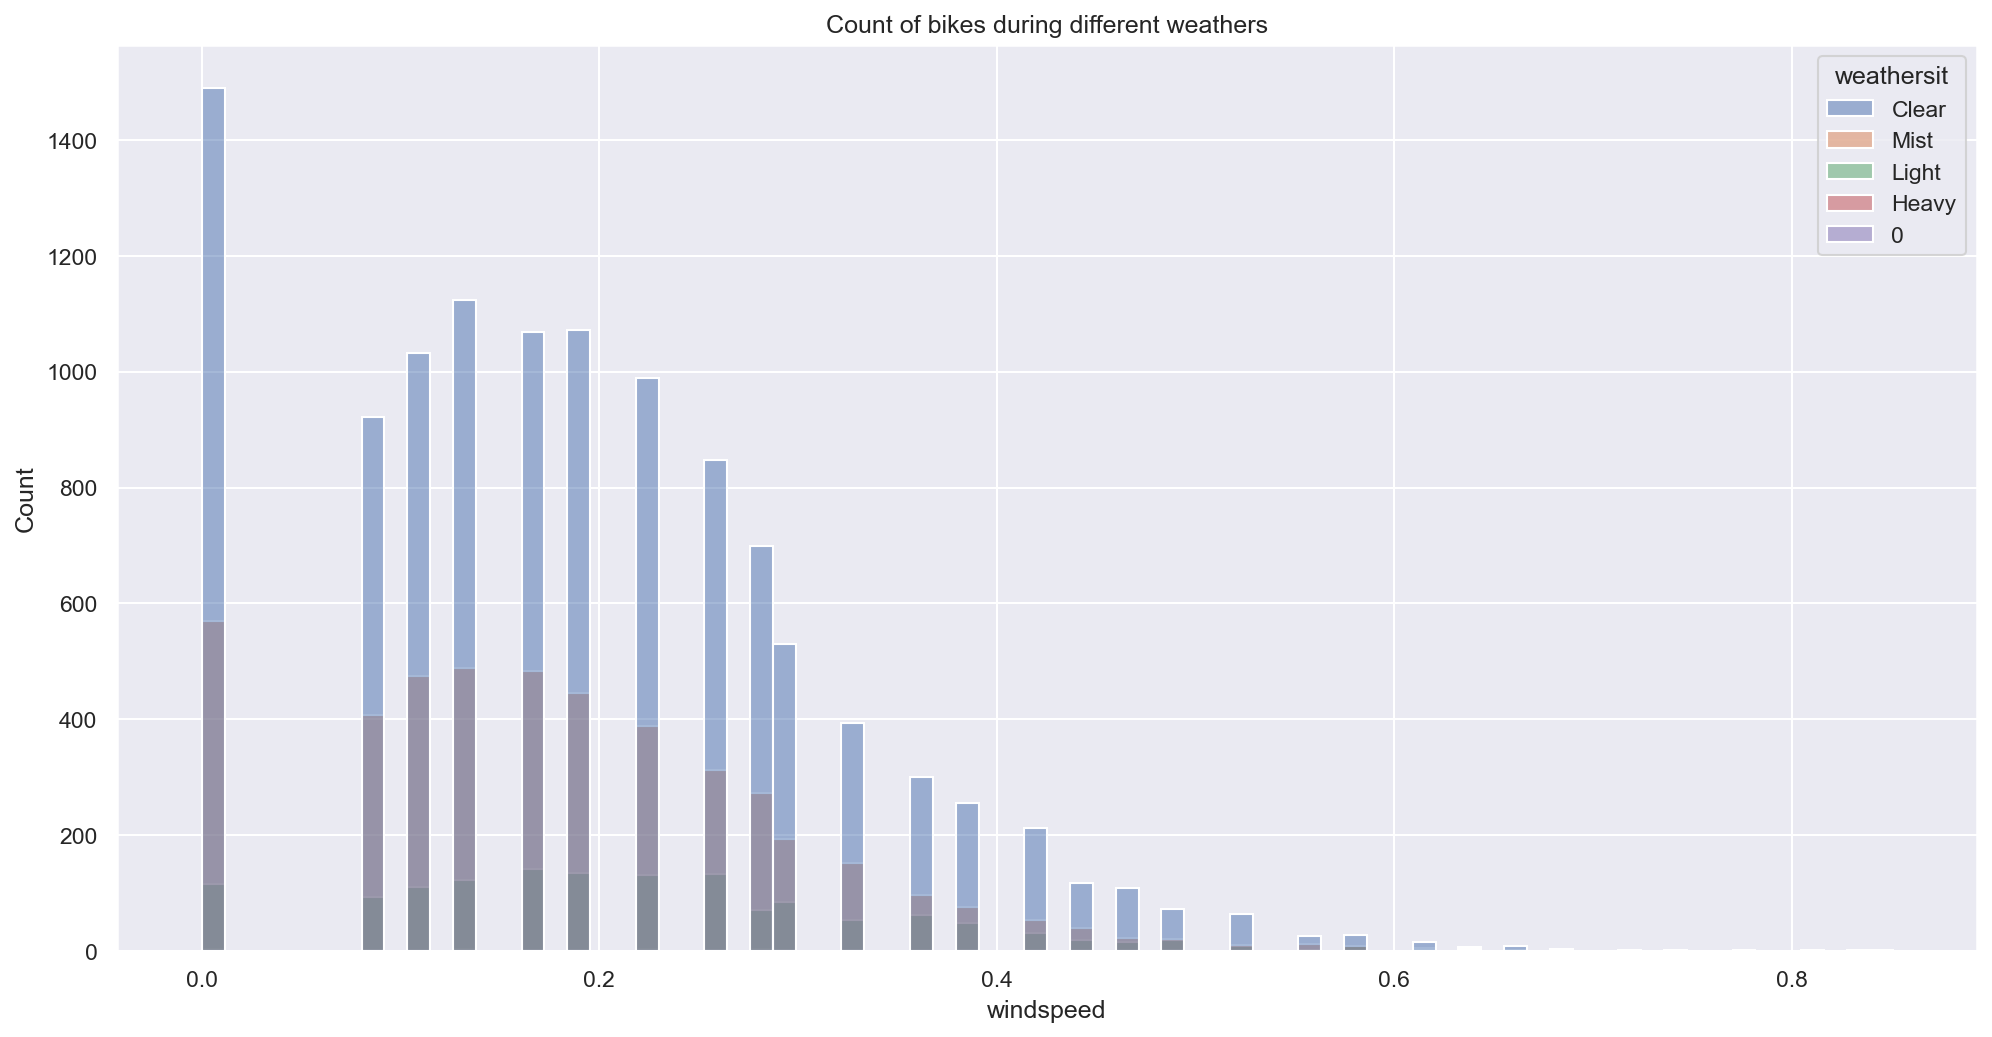

In [186]:
fig, ax = plt.subplots()
sns.histplot(data=df, x="windspeed", hue="weathersit")
ax.set(title="Count of bikes during different weathers")
plt.show()

Since I doubted the usefulness of the windspeed variable I was also interested to see the effects it had on users, additionally I also looked at the weather which was not used before.
It seems that I was wrong and the windspeed does have an effect on the numer of users, especially on casual ones on the weekends. However the general weather does not have that great of an effect, and conclusions can not be properly drawn because of the 0 value in the weathersit column.